In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.75)

import scipy.special as sp
import sklearn.datasets as datasets
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import econml
import importlib

#### data generation packages
import strawman_edge
import strawman_center
import all_linear
import all_nonlinear

#### main packages
import characterize
import estimate_atte as est
import learn_w as learn
import black

importlib.reload(est)
importlib.reload(learn)

import warnings

warnings.filterwarnings("ignore")

%load_ext jupyter_black

# Box DGP

In [ ]:
df, Y = strawman_edge.get_data(n=10000, seed=0)
outcome = "Yobs"
treatment = "T"
sample = "S"
TE = Y["Y1"] - Y["Y0"]
df_true = df.copy(deep=True)
df_true["TE"] = TE

In [ ]:
importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.kmeans_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
)

# D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w", data=D_labels, ax=ax)
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

brute_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.linear_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=42
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

linear_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.tree_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=0
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

tree_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=2 / 5,
)

# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_rash.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")
df_refined = df.join(D_w_true[["w"]])
df_refined = df_refined.loc[df_refined["w"] == 1]

np.random.seed(42)
df_v, pi, pi_m, e_m, testing_data = learn.estimate_dml(
    data=df_refined, outcome="Yobs", treatment="T", sample="S", crossfit=5
)

forest_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                df_v["te"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

print(
    pd.concat([forest_box_r, tree_box_r, linear_box_r, brute_box_r], axis=1).to_latex()
)

In [ ]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=2 / 5,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_box.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax, hue_order=[1, 0])
plt.legend(title="w", loc="lower left")
plt.tight_layout()
fig.savefig("forest_box.pdf", format="pdf", dpi=600)

# Community DGP

In [ ]:
importlib.reload(strawman_center)
df, Y = strawman_center.get_data(n=5000, seed=0)
outcome = "Yobs"
treatment = "T"
sample = "S"
TE = Y["Y1"] - Y["Y0"]
df_true = df.copy(deep=True)
df_true["TE"] = TE

In [ ]:
importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.kmeans_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
)

# D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w", data=D_labels, ax=ax)
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

brute_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.linear_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=42
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

linear_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.tree_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=0
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

tree_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=1 / 2,
    top_k_trees=True,
    k=10,
)

# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_rash.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")
df_refined = df.join(D_w_true[["w"]])
df_refined = df_refined.loc[df_refined["w"] == 1]

np.random.seed(42)
df_v, pi, pi_m, e_m, testing_data = learn.estimate_dml(
    data=df_refined, outcome="Yobs", treatment="T", sample="S", crossfit=5
)

forest_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                df_v["te"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

print(
    pd.concat([forest_box_r, tree_box_r, linear_box_r, brute_box_r], axis=1).to_latex()
)

In [ ]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=1 / 2,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_community.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax, hue_order=[1, 0])
# plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_community.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
plt.tight_layout()

# Highdimensional DGP

In [ ]:
importlib.reload(all_linear)
df, Y, coef = all_linear.get_data(n=5000, seed=1)
outcome = "Yobs"
treatment = "T"
sample = "S"
TE = Y["Y1"] - Y["Y0"]
df_true = df.copy(deep=True)
df_true["TE"] = TE

In [ ]:
importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.kmeans_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
)

# D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w", data=D_labels, ax=ax)
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

brute_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.linear_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=42
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

linear_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_labels, f, testing_data = learn.tree_opt(
    data=df, outcome=outcome, treatment=treatment, sample=sample, seed=0
)

D_labels["w"] = D_labels["w"].astype(int)
# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(
#     x="X0", y="X1", hue="w", data=D_labels, ax=ax, hue_order={0: "C1", 1: "C2"}
# )
# plt.legend(title="w")
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_labels.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")

tree_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                D_w_true.loc[(D_w_true["S_true"] == 1) * (D_w_true["w_true"] == 1)][
                    "v"
                ].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w_true"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

importlib.reload(learn)
np.random.seed(42)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=0.5,
    num_trees=2000,
    vote_threshold=2 / 3,
    top_k_trees=True,
    k=20,
)

# fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# # plt.xlim(-0.01, 1.25)
# # plt.ylim(-0.01, 1.25)
# plt.legend(ncols=2, loc="lower left")
# plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_rash.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")
df_refined = df.join(D_w_true[["w"]])
df_refined = df_refined.loc[df_refined["w"] == 1]

np.random.seed(42)
df_v, pi, pi_m, e_m, testing_data = learn.estimate_dml(
    data=df_refined, outcome="Yobs", treatment="T", sample="S", crossfit=5
)

forest_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                df_v["te"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

print(
    pd.concat([forest_box_r, tree_box_r, linear_box_r, brute_box_r], axis=1).to_latex()
)

In [ ]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=4 / 5,
    top_k_trees=True,
    k=10,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_linear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X2", y="X7", hue="w_opt", data=D_rash, ax=ax, hue_order=[1, 0])
plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_linear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(
    x="X2",
    y="X7",
    hue="S",
    data=df,
    ax=ax,
    palette="Set1",
    legend=False,
)
plt.tight_layout()

# Nonlinear DGP

In [24]:
import all_nonlinear

importlib.reload(all_nonlinear)
df, Y, coef = all_nonlinear.get_data_nonlinear(n=10000, seed=1)
outcome = "Yobs"
treatment = "T"
sample = "S"
TE = Y["Y1"] - Y["Y0"]
df_true = df.copy(deep=True)
df_true["TE"] = TE

(array([-9.18201994, -3.57057139, -5.95389448, ..., -0.89460661,
       -3.32115496, -3.10689812]), array([1.02861946e-04, 2.73695962e-02, 2.58899158e-03, ...,
       2.90160100e-01, 3.48525374e-02, 4.28236093e-02]))


In [26]:
df["S"].sum()

828

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
ATE Est: -0.0307
leaf    0.333333
X0      0.064914
X1      0.075572
X2      0.026567
X3      0.075133
X4      0.049737
X5      0.013963
X6      0.005566
X7      0.084114
X8      0.039126
X9      0.038654
X10     0.047340
X11     0.052852
X12     0.003696
X13     0.007965
X14     0.007466
X15     0.019684
X16     0.014857
X17     0.002332
X18     0.008292
X19     0.028836
dtype: float64
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


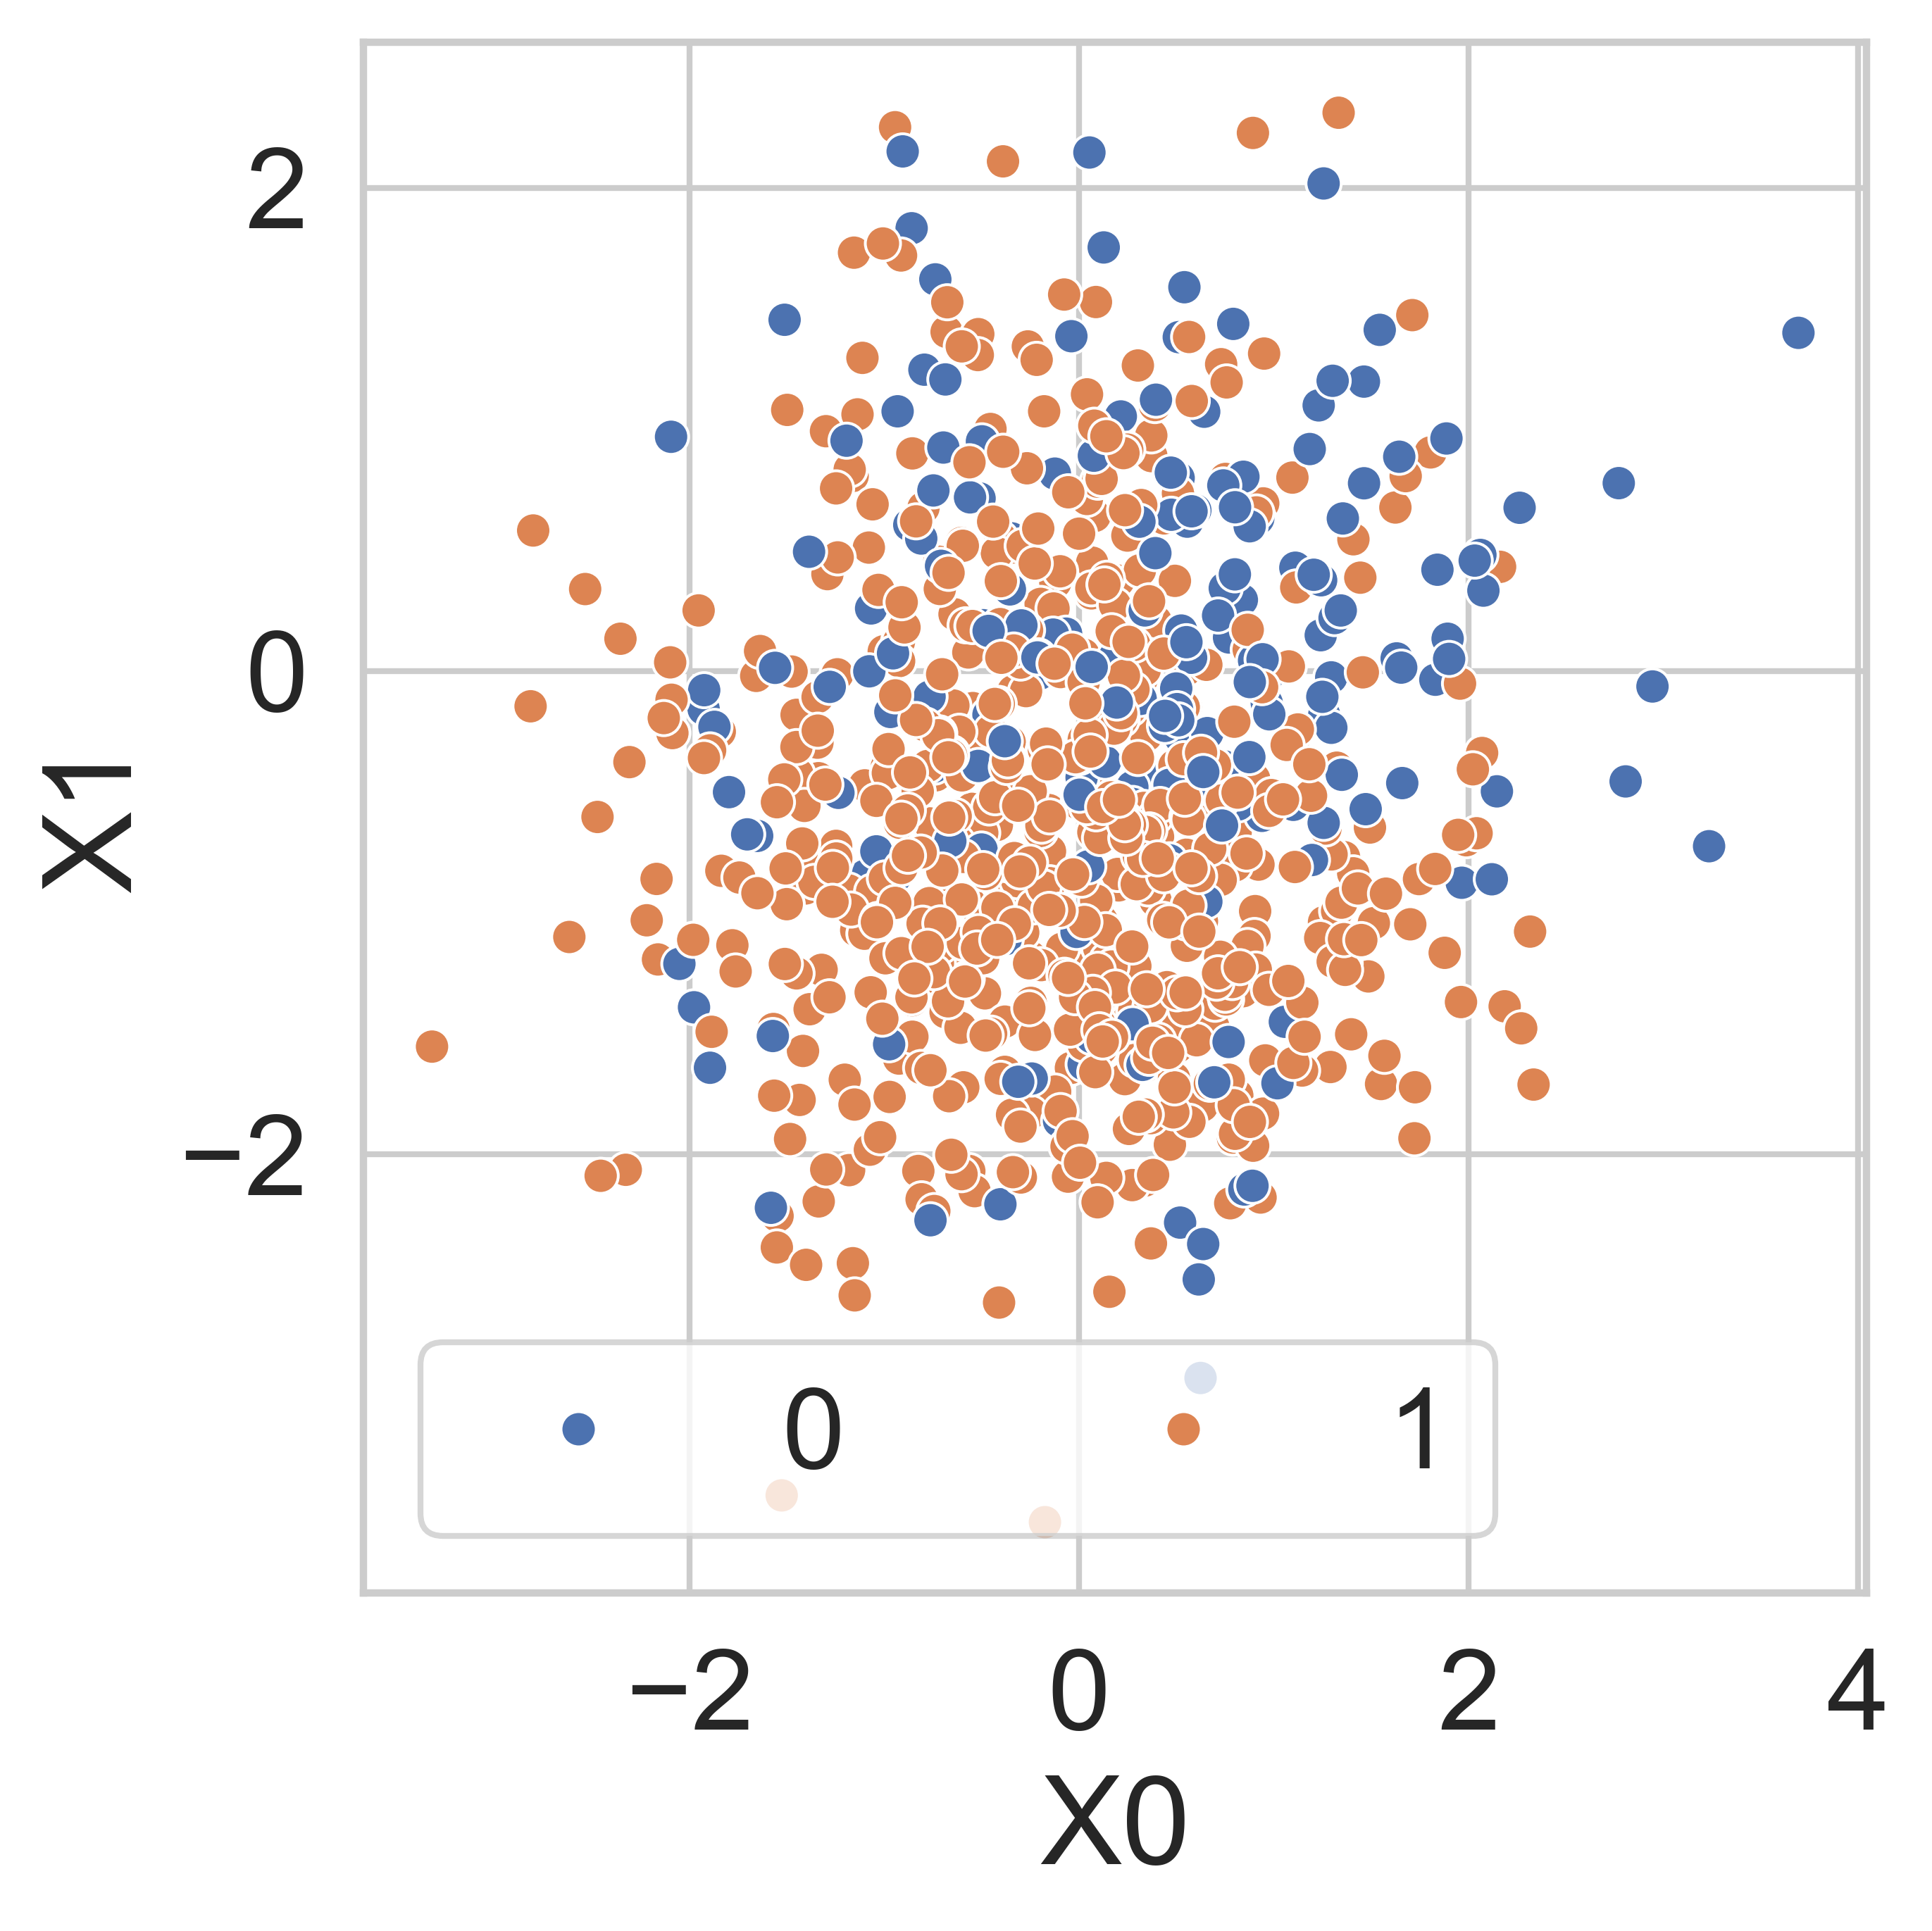

In [28]:
importlib.reload(learn)
np.random.seed(42)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=0.5,
    num_trees=2000,
    vote_threshold=2 / 3,
    top_k_trees=True,
    k=20,
)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# plt.xlim(-0.01, 1.25)
# plt.ylim(-0.01, 1.25)
plt.legend(ncols=2, loc="lower left")
plt.tight_layout()

df_true["w"] = f.predict(df_true[[col for col in df_true.columns if "X" in col]])
D_w_true = D_rash.join(df_true[["TE", "S", "w"]], rsuffix="_true", how="outer")
df_refined = df.join(D_w_true[["w"]])
df_refined = df_refined.loc[df_refined["w"] == 1]

np.random.seed(42)
df_v, pi, pi_m, e_m, testing_data = learn.estimate_dml(
    data=df_refined, outcome="Yobs", treatment="T", sample="S", crossfit=5
)

forest_box_r = pd.DataFrame(
    [
        [
            (
                D_w_true.loc[(D_w_true["S_true"] == 1)]["v"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0)]["TE"].mean()
            ),
            (
                df_v["te"].mean()
                - D_w_true.loc[(D_w_true["S_true"] == 0) * (D_w_true["w"] == 1)][
                    "TE"
                ].mean()
            ),
        ],
        [
            np.sqrt(
                D_w_true.loc[(D_w_true["S"] == 1)]["vsq"].sum()
                / (D_w_true.loc[(D_w_true["S"] == 1)].shape[0]) ** 2
            ),
            (
                np.sqrt(
                    D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)][
                        "vsq"
                    ].sum()
                    / (
                        D_w_true.loc[(D_w_true["S"] == 1) * (D_w_true["w"] == 1)].shape[
                            0
                        ]
                    )
                    ** 2
                )
            ),
        ],
    ],
    index=["Bias", "Stdev"],
    columns=["Pre", "Post"],
)

# print(
#     pd.concat([forest_box_r, tree_box_r, linear_box_r, brute_box_r], axis=1).to_latex()
# )

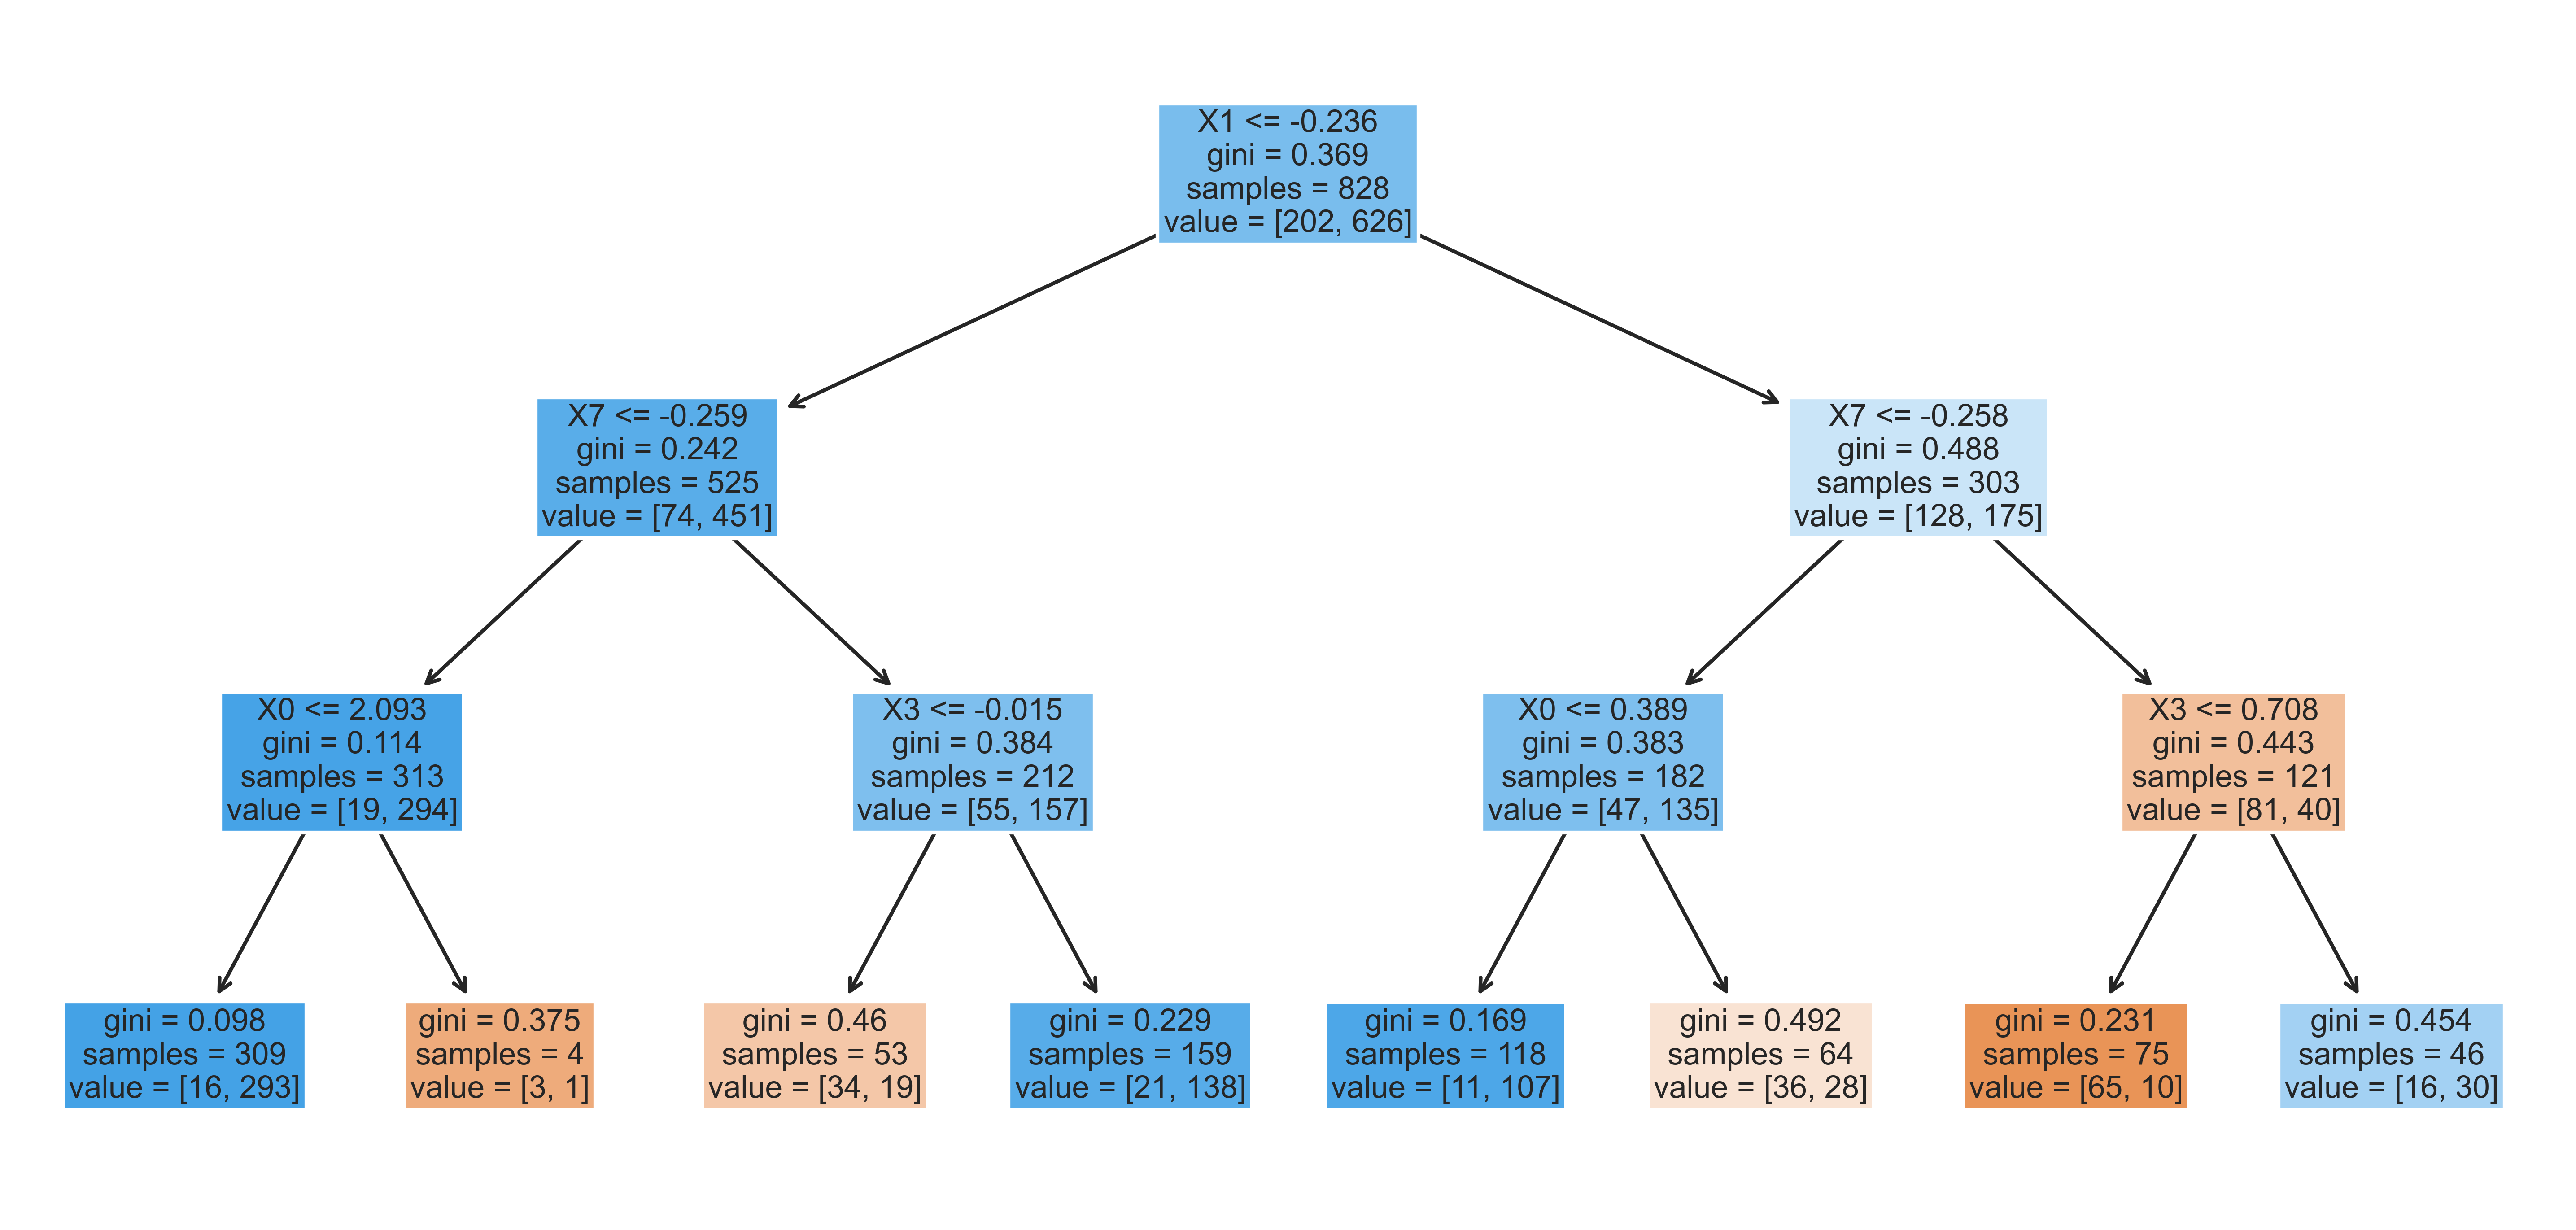

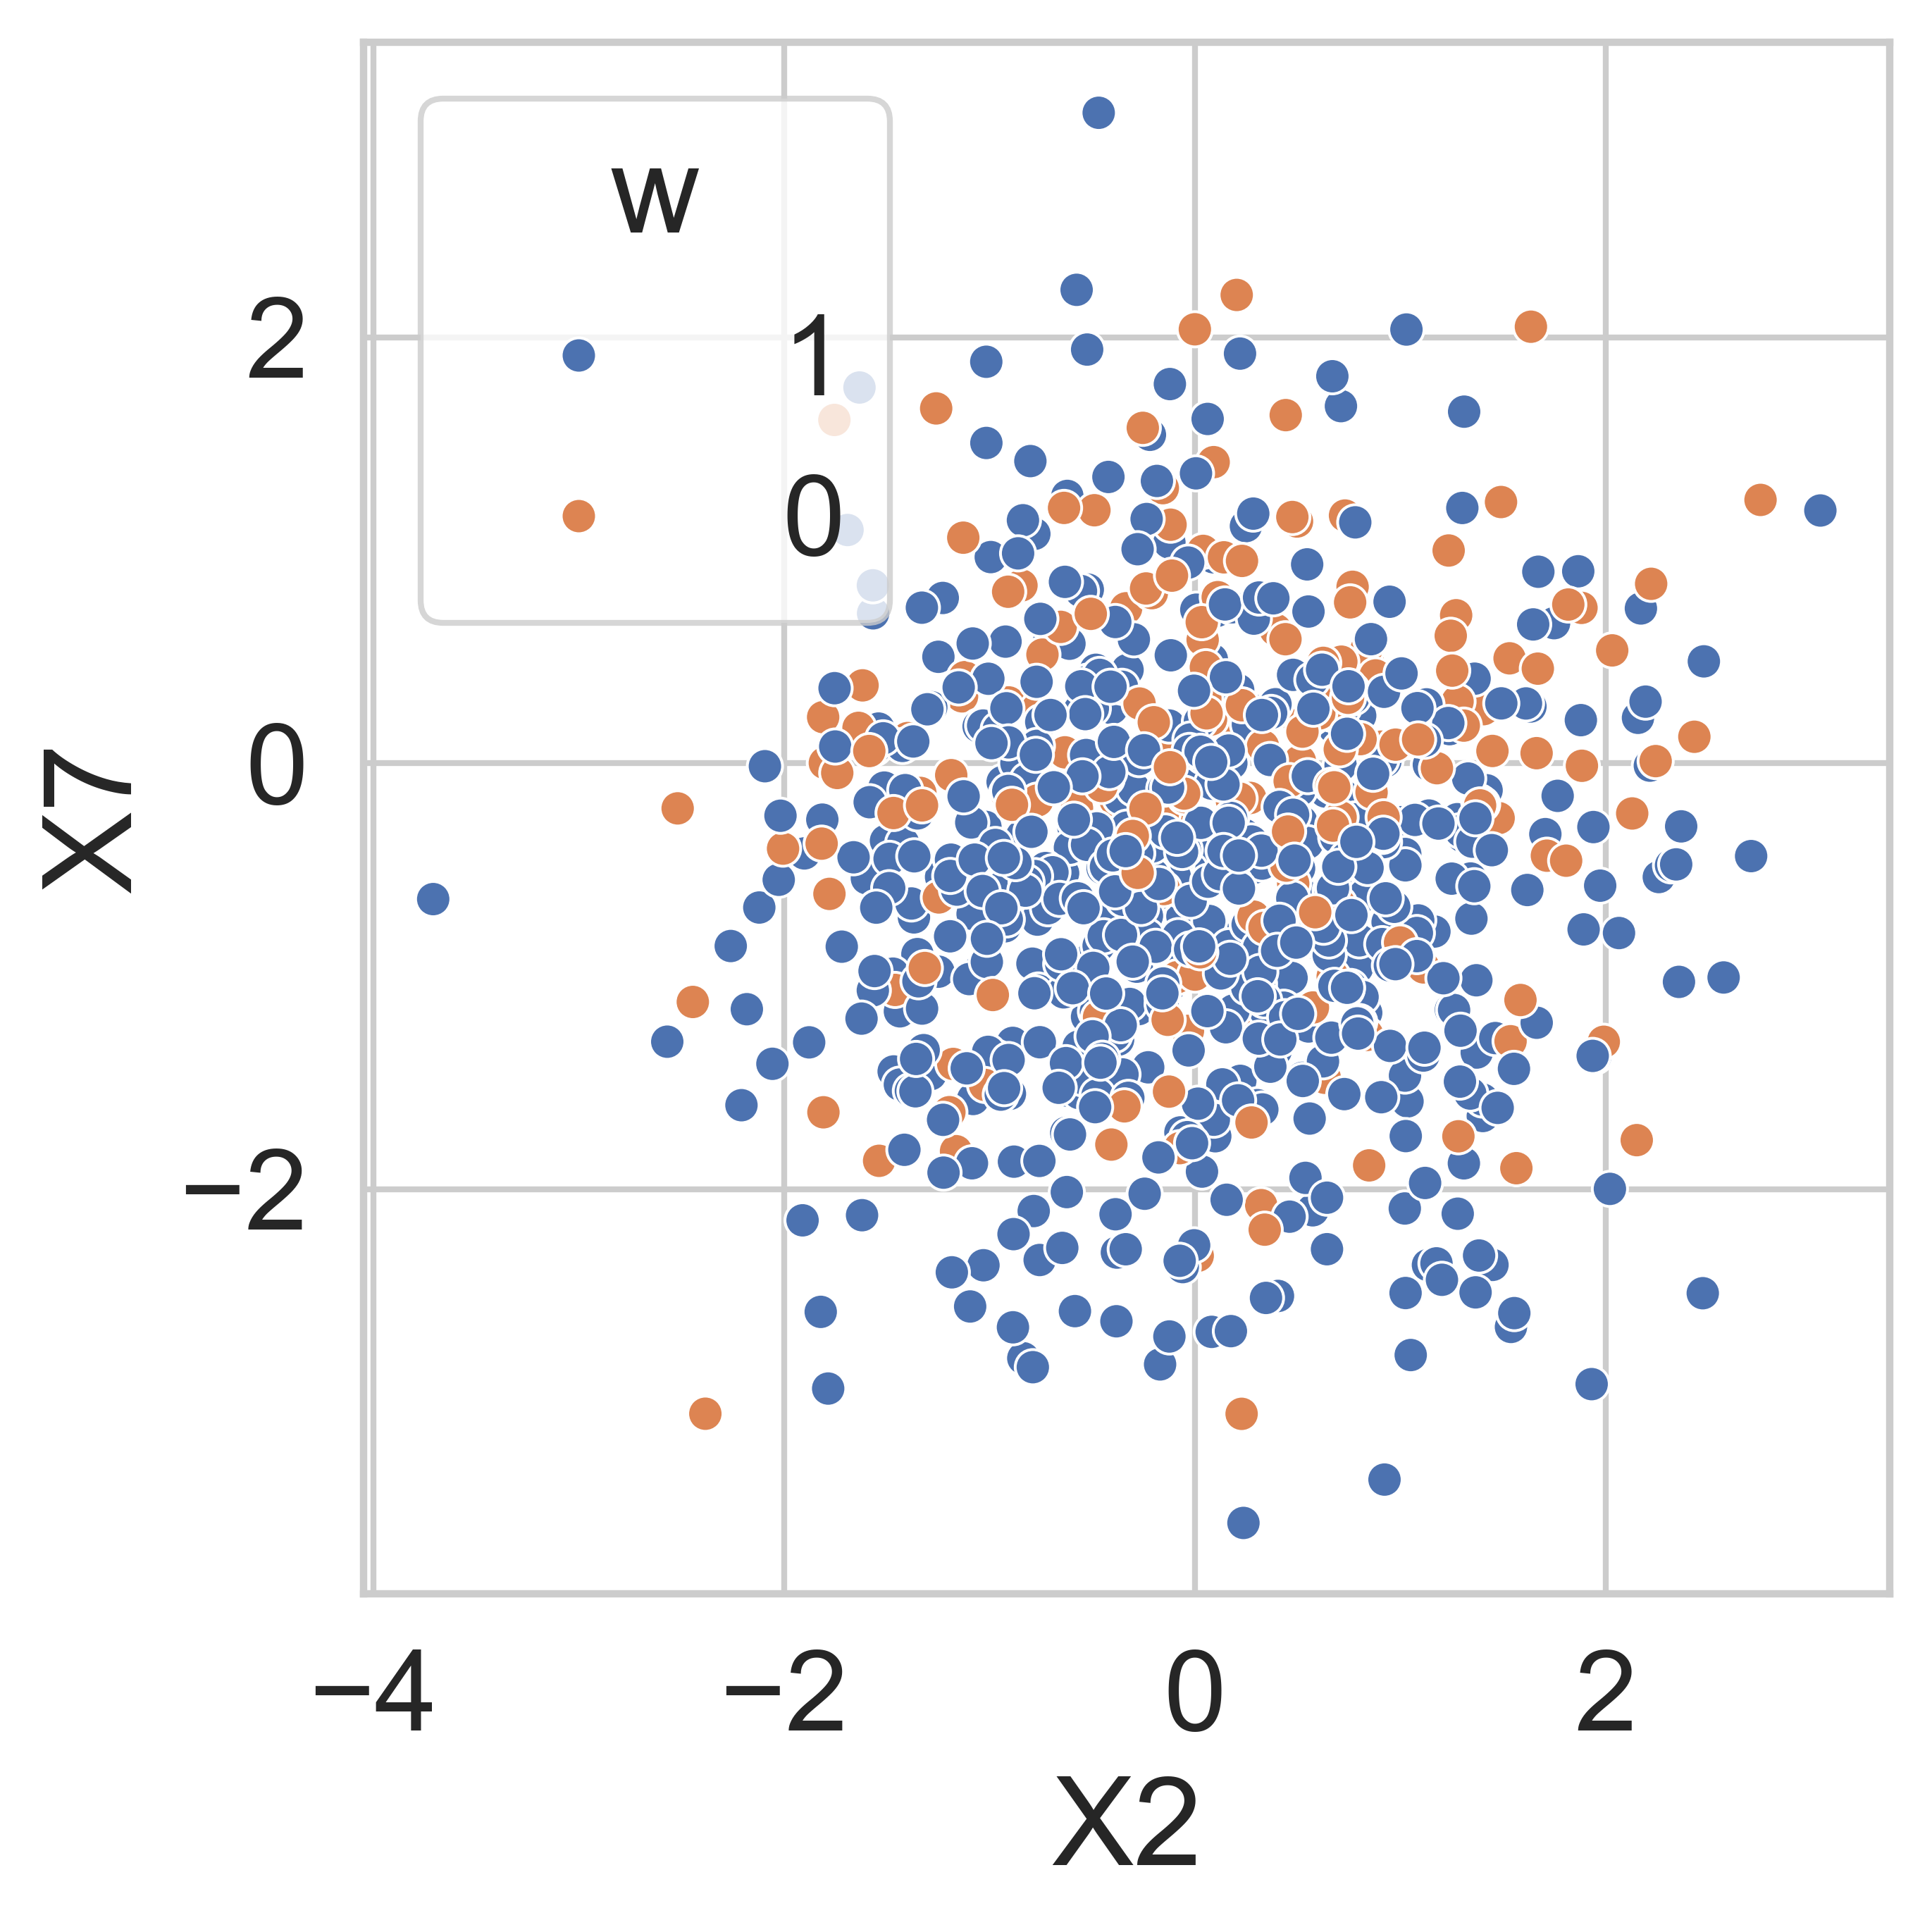

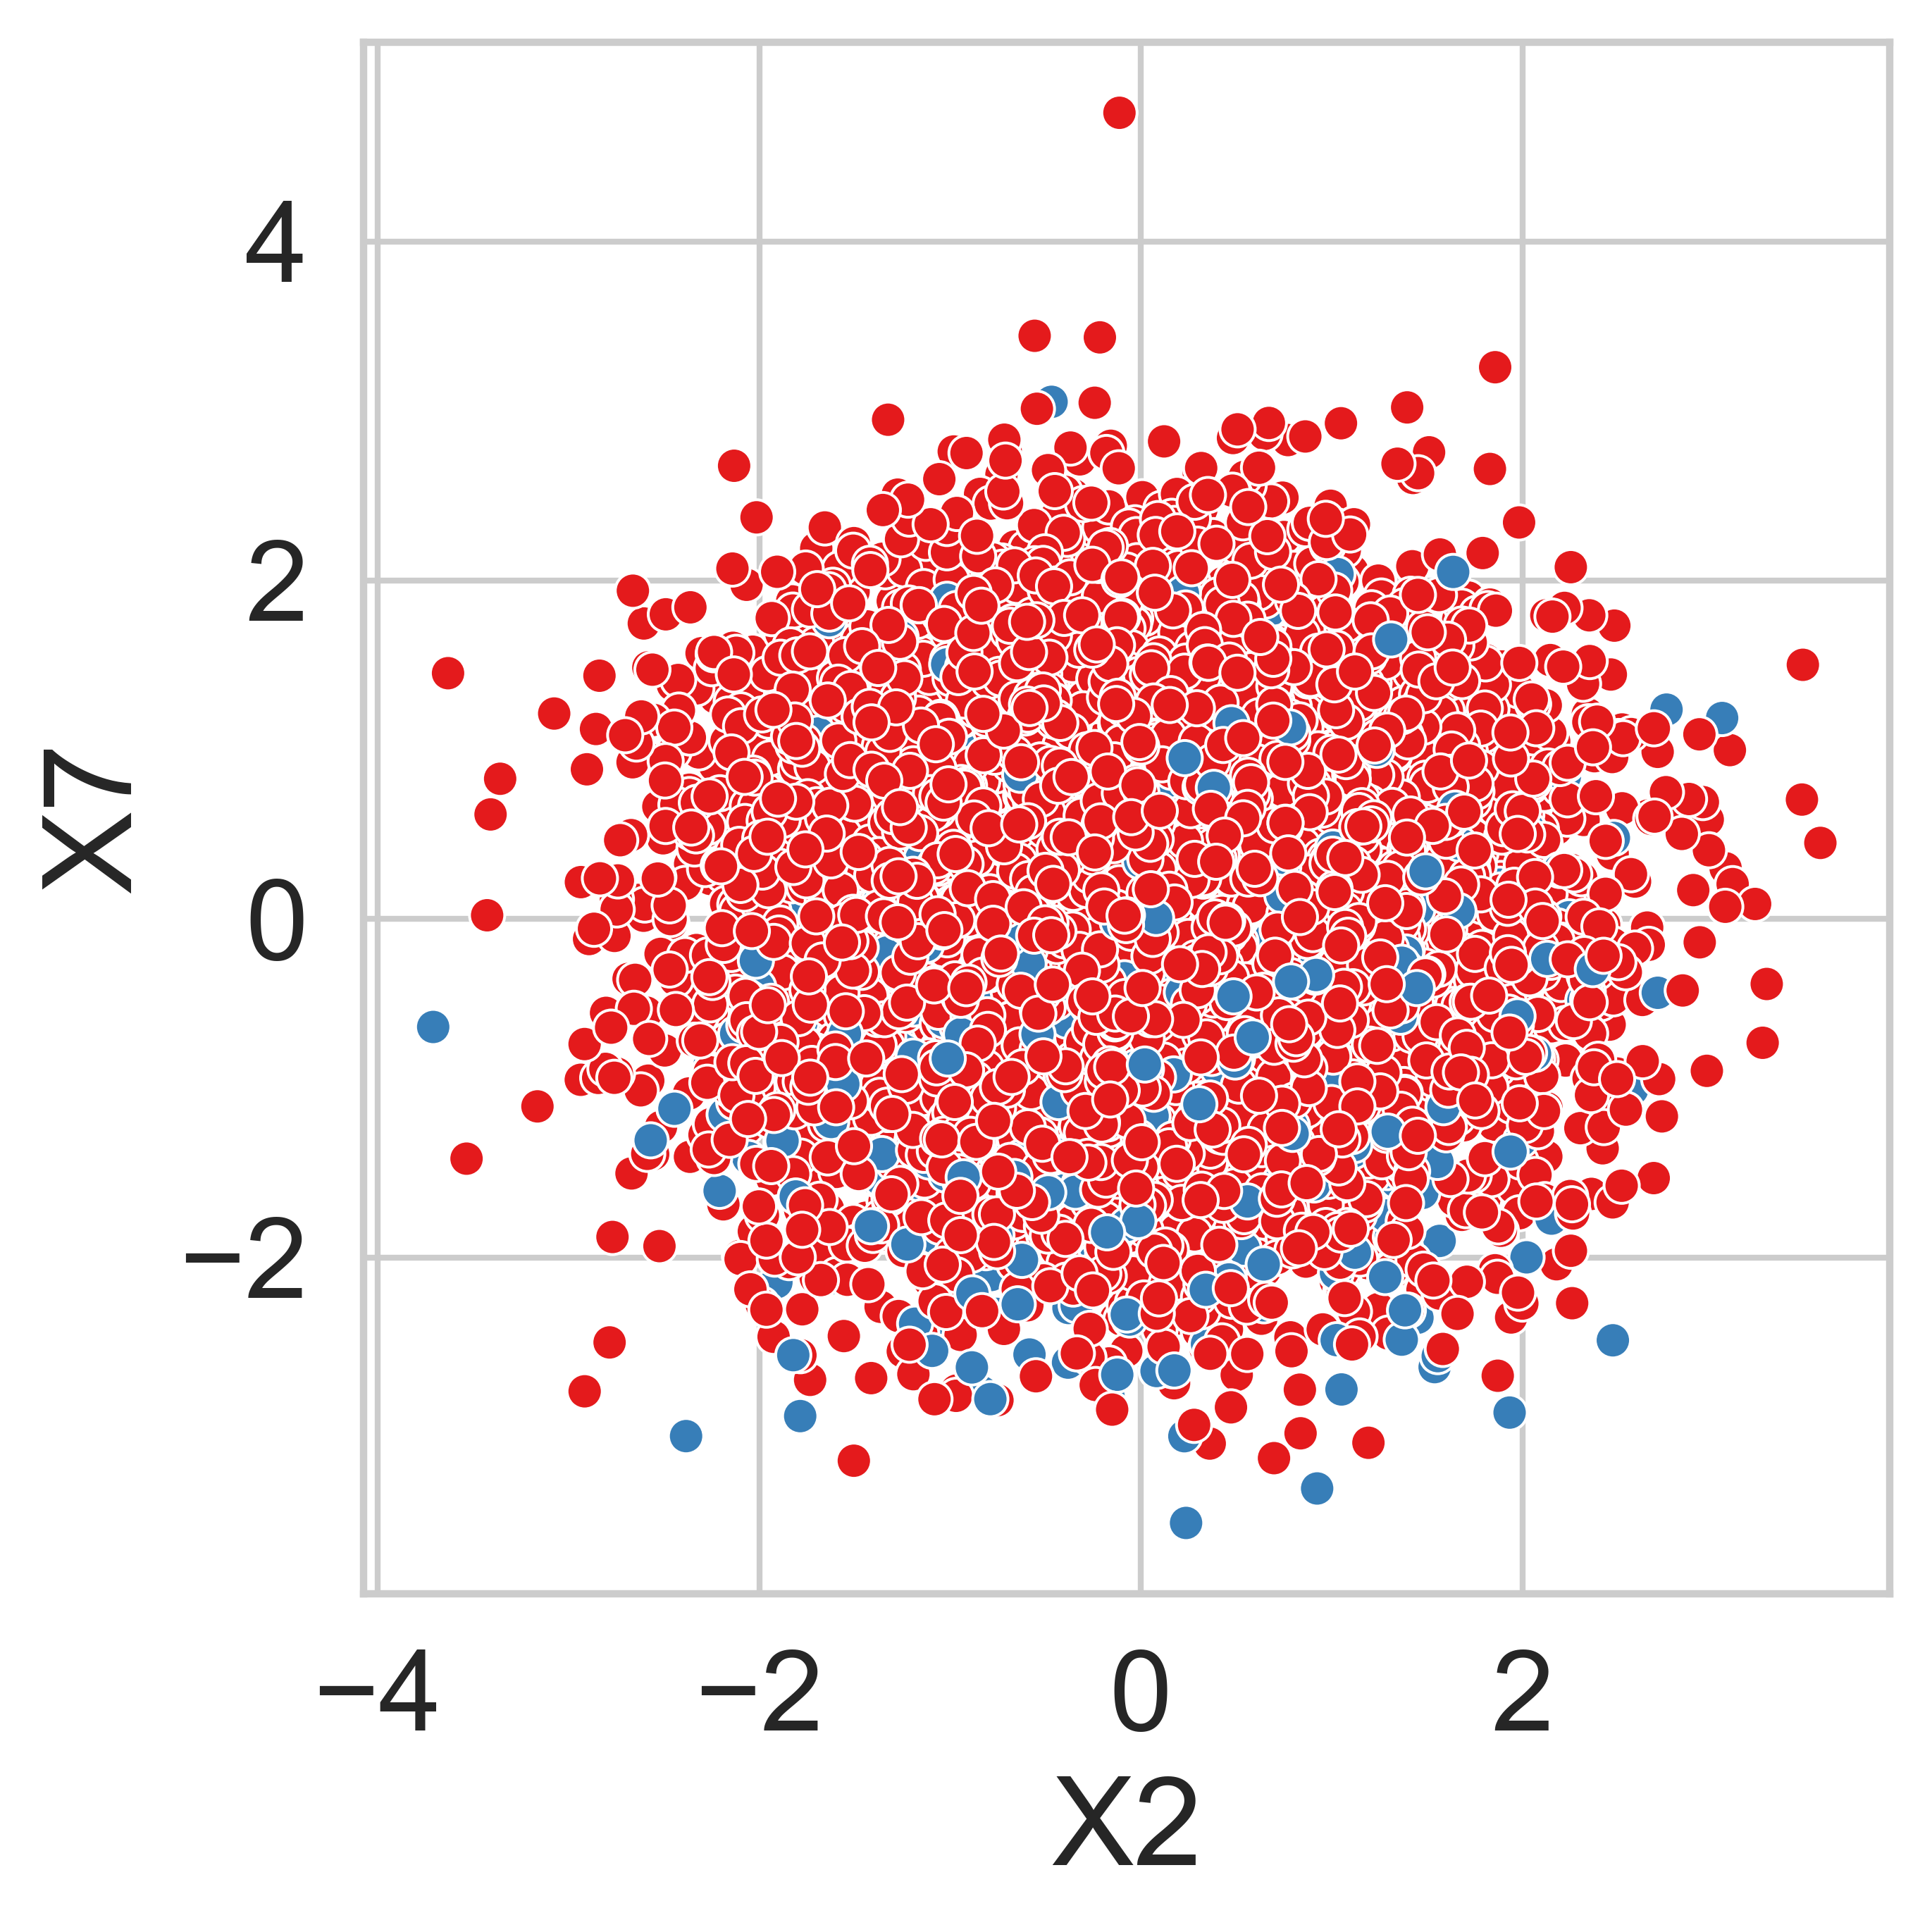

In [29]:
# importlib.reload(learn)
# D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
#     data=df,
#     outcome=outcome,
#     treatment=treatment,
#     sample=sample,
#     leaf_proba=1,
#     num_trees=3000,
#     vote_threshold=4 / 5,
#     top_k_trees=True,
#     k=10,
# )
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(10, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_nonlinear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X2", y="X7", hue="w_opt", data=D_rash, ax=ax, hue_order=[1, 0])
plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_nonlinear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(
    x="X2",
    y="X7",
    hue="S",
    data=df,
    ax=ax,
    palette="Set1",
    legend=False,
)
plt.tight_layout()